# Task-1:-  Blob detection and Image Quality Enhancement.

## Blob Detection


Processing platelets.jpg


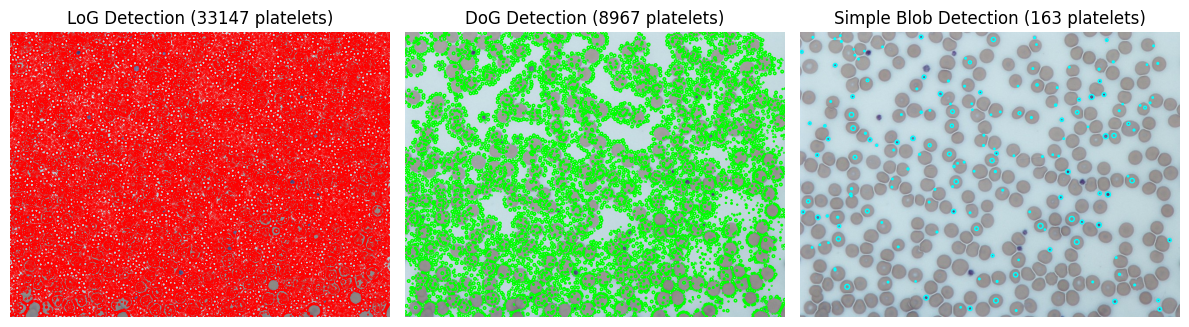

Number of platelets detected (LoG): 33147
Number of platelets detected (DoG): 8967
Number of platelets detected (Simple Blob Detector): 163


In [9]:
import cv2
import numpy as np
from skimage.feature import blob_log, blob_dog
import matplotlib.pyplot as plt

class PlateletDetector:
    def __init__(self, image_path):
        """Initialize with image path and load the image."""
        self.image_path = image_path
        try:
            self.original_image = cv2.imread(self.image_path, cv2.IMREAD_COLOR)
            if self.original_image is None:
                raise FileNotFoundError(f"Could not load image at {self.image_path}")
            
            # Convert to grayscale and apply slight blur to reduce noise
            self.gray_image = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2GRAY)
            self.gray_image = cv2.GaussianBlur(self.gray_image, (3, 3), 0)
            self.gray_image = cv2.equalizeHist(self.gray_image)  # Enhance contrast
        except Exception as e:
            print(f"Error loading image: {e}")
            raise

    def detect_blobs_log(self):
        """Detect platelets using Laplacian of Gaussian (LoG)."""
        blobs = blob_log(self.gray_image, min_sigma=0.5, max_sigma=3, num_sigma=15, threshold=0.02)
        blobs[:, 2] = blobs[:, 2] * np.sqrt(2)  # Scale radii for visualization
        return blobs

    def detect_blobs_dog(self):
        """Detect platelets using Difference of Gaussian (DoG)."""
        blobs = blob_dog(self.gray_image, min_sigma=0.5, max_sigma=3, threshold=0.02)
        blobs[:, 2] = blobs[:, 2] * np.sqrt(2)  # Scale radii for visualization
        return blobs

    def detect_blobs_simple(self):
        """Detect platelets using OpenCV SimpleBlobDetector."""
        params = cv2.SimpleBlobDetector_Params()
        params.minThreshold = 10
        params.maxThreshold = 100
        params.filterByArea = True
        params.minArea = 5
        params.maxArea = 100  # Avoid detecting RBCs
        params.filterByCircularity = True
        params.minCircularity = 0.7
        params.filterByConvexity = True
        params.minConvexity = 0.85
        params.filterByInertia = True
        params.minInertiaRatio = 0.2

        detector = cv2.SimpleBlobDetector_create(params)
        keypoints = detector.detect(self.gray_image)
        blobs = np.array([[kp.pt[1], kp.pt[0], kp.size / 2] for kp in keypoints])
        return blobs

    def visualize_results(self, blobs_log, blobs_dog, blobs_simple):
        """Visualize detected platelets using different methods."""
        plt.figure(figsize=(12, 8))

        # LoG Detection
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB))
        for blob in blobs_log:
            y, x, r = blob
            circle = plt.Circle((x, y), r, color='red', linewidth=1, fill=False)
            plt.gca().add_patch(circle)
        plt.title(f'LoG Detection ({len(blobs_log)} platelets)')
        plt.axis('off')

        # DoG Detection
        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB))
        for blob in blobs_dog:
            y, x, r = blob
            circle = plt.Circle((x, y), r, color='lime', linewidth=1, fill=False)
            plt.gca().add_patch(circle)
        plt.title(f'DoG Detection ({len(blobs_dog)} platelets)')
        plt.axis('off')

        # Simple Blob Detector
        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB))
        for blob in blobs_simple:
            y, x, r = blob
            circle = plt.Circle((x, y), r, color='cyan', linewidth=1, fill=False)
            plt.gca().add_patch(circle)
        plt.title(f'Simple Blob Detection ({len(blobs_simple)} platelets)')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

def process_platelet_image(image_path):
    """Process a blood sample image to detect platelets."""
    try:
        detector = PlateletDetector(image_path)

        # Detect blobs using different methods
        blobs_log = detector.detect_blobs_log()
        blobs_dog = detector.detect_blobs_dog()
        blobs_simple = detector.detect_blobs_simple()

        # Visualize results
        detector.visualize_results(blobs_log, blobs_dog, blobs_simple)

        # Print detected counts
        print(f"Number of platelets detected (LoG): {len(blobs_log)}")
        print(f"Number of platelets detected (DoG): {len(blobs_dog)}")
        print(f"Number of platelets detected (Simple Blob Detector): {len(blobs_simple)}")

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

def main():
    """Run platelet detection on an image."""
    image_path = "platelets.jpg"  # Ensure the correct image path
    print(f"\nProcessing {image_path}")
    process_platelet_image(image_path)

if __name__ == "__main__":
    main()



Processing platelets.jpg


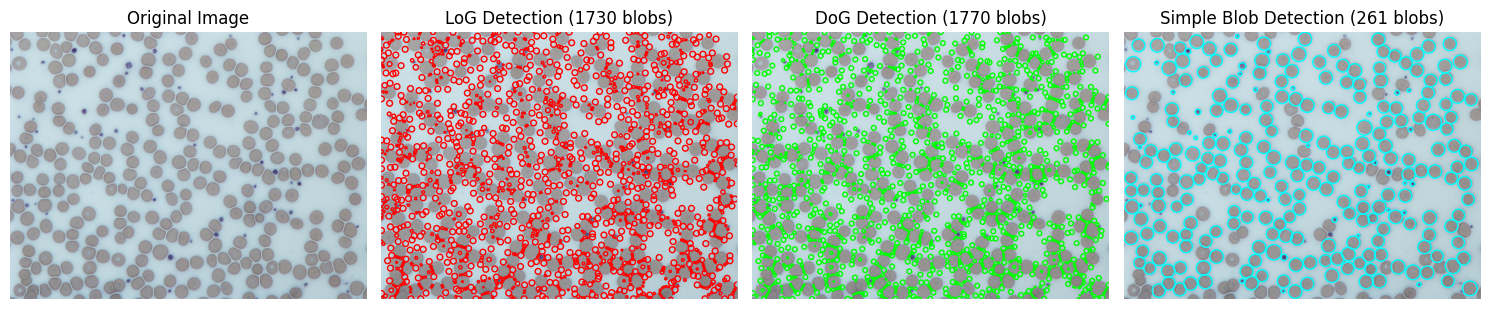

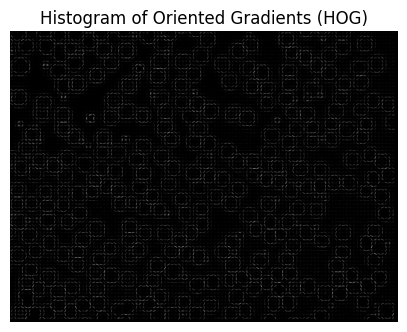

Number of blobs (LoG): 1730
Number of blobs (DoG): 1770
Number of blobs (Simple Blob Detector): 261


In [10]:
import cv2
import numpy as np
from skimage.feature import blob_log, blob_dog, hog
import matplotlib.pyplot as plt

class BlobDetector:
    def __init__(self, image_path):
        """Initialize with image path and load the image."""
        self.image_path = image_path
        try:
            self.original_image = cv2.imread(self.image_path, cv2.IMREAD_COLOR)
            if self.original_image is None:
                raise FileNotFoundError(f"Could not load image at {self.image_path}")
            
            # Preprocess the image: Convert to grayscale, apply Gaussian blur, and enhance contrast
            self.gray_image = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2GRAY)
            self.gray_image = cv2.GaussianBlur(self.gray_image, (5, 5), 0)  # Reduce noise
            self.gray_image = cv2.equalizeHist(self.gray_image)  # Enhance contrast
        except Exception as e:
            print(f"Error loading image: {e}")
            raise

    def detect_blobs_log(self, min_sigma=1, max_sigma=2, num_sigma=10, threshold=0.1):
        """Detect blobs using Laplacian of Gaussian (LoG)."""
        blobs = blob_log(self.gray_image, min_sigma=min_sigma, max_sigma=max_sigma, 
                         num_sigma=num_sigma, threshold=threshold)
        blobs[:, 2] = blobs[:, 2] * np.sqrt(2)  # Scale radii for visualization
        return blobs

    def detect_blobs_dog(self, min_sigma=1, max_sigma=2, threshold=0.1):
        """Detect blobs using Difference of Gaussian (DoG)."""
        blobs = blob_dog(self.gray_image, min_sigma=min_sigma, max_sigma=max_sigma, 
                         threshold=threshold)
        blobs[:, 2] = blobs[:, 2] * np.sqrt(2)  # Scale radii for visualization
        return blobs

    def detect_hog_features(self, orientations=9, pixels_per_cell=(8, 8), 
                           cells_per_block=(2, 2)):
        """Detect features using Histogram of Oriented Gradients (HOG)."""
        features, hog_image = hog(self.gray_image, orientations=orientations,
                                 pixels_per_cell=pixels_per_cell,
                                 cells_per_block=cells_per_block,
                                 visualize=True)
        return features, hog_image

    def detect_blobs_simple(self, min_threshold=20, max_threshold=100, 
                           min_area=0.000005, min_convexity=0.8, min_inertia=0.5):
        """Detect blobs using OpenCV SimpleBlobDetector."""
        params = cv2.SimpleBlobDetector_Params()
        params.minThreshold = min_threshold
        params.maxThreshold = max_threshold
        params.filterByArea = True
        params.minArea = min_area
        params.filterByConvexity = True
        params.minConvexity = min_convexity
        params.filterByInertia = True
        params.minInertiaRatio = min_inertia
        params.filterByCircularity = True
        params.minCircularity = 0.8  # Ensure detected blobs are circular

        ver = (cv2.__version__).split('.')
        if int(ver[0]) < 3:
            detector = cv2.SimpleBlobDetector(params)
        else:
            detector = cv2.SimpleBlobDetector_create(params)
        
        keypoints = detector.detect(self.gray_image)
        blobs = np.array([[kp.pt[1], kp.pt[0], kp.size / 2] for kp in keypoints])
        return blobs

    def visualize_all_results(self, blobs_log, blobs_dog, blobs_simple, hog_image):
        """Visualize all detection results in a single figure with subplots."""
        plt.figure(figsize=(15, 12))
        
        # Original Image
        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        # LoG Detection
        plt.subplot(1, 4, 2)
        plt.imshow(cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB))
        for blob in blobs_log:
            y, x, r = blob
            circle = plt.Circle((x, y), r, color='red', linewidth=1, fill=False)
            plt.gca().add_patch(circle)
        plt.title(f'LoG Detection ({len(blobs_log)} blobs)')
        plt.axis('off')
        
        # DoG Detection
        plt.subplot(1, 4, 3)
        plt.imshow(cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB))
        for blob in blobs_dog:
            y, x, r = blob
            circle = plt.Circle((x, y), r, color='lime', linewidth=1, fill=False)
            plt.gca().add_patch(circle)
        plt.title(f'DoG Detection ({len(blobs_dog)} blobs)')
        plt.axis('off')
        
        # Simple Blob Detection
        plt.subplot(1, 4, 4)
        plt.imshow(cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB))
        for blob in blobs_simple:
            y, x, r = blob
            circle = plt.Circle((x, y), r, color='cyan', linewidth=1, fill=False)
            plt.gca().add_patch(circle)
        plt.title(f'Simple Blob Detection ({len(blobs_simple)} blobs)')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # HOG Visualization (separate figure)
        plt.figure(figsize=(5, 5))
        plt.imshow(hog_image, cmap='gray')
        plt.title('Histogram of Oriented Gradients (HOG)')
        plt.axis('off')
        plt.show()

def process_image(image_path):
    """Process a single image with blob detection methods."""
    try:
        detector = BlobDetector(image_path)
        
        # Detect blobs with different methods
        blobs_log = detector.detect_blobs_log(min_sigma=1, max_sigma=5, num_sigma=10, threshold=0.05)
        blobs_dog = detector.detect_blobs_dog(min_sigma=1, max_sigma=5, threshold=0.05)
        blobs_simple = detector.detect_blobs_simple(min_threshold=20, max_threshold=150, 
                                                    min_area=50, min_convexity=0.8, min_inertia=0.5)
        _, hog_image = detector.detect_hog_features()
        
        # Visualize all results
        detector.visualize_all_results(blobs_log, blobs_dog, blobs_simple, hog_image)
        
        # Print blob counts
        print(f"Number of blobs (LoG): {len(blobs_log)}")
        print(f"Number of blobs (DoG): {len(blobs_dog)}")
        print(f"Number of blobs (Simple Blob Detector): {len(blobs_simple)}")
        
    except Exception as e:
        print(f"Error processing {image_path}: {e}")

def main():
    # Process only the platelets.jpg image
    image_path = "platelets.jpg"
    print(f"\nProcessing {image_path}")
    process_image(image_path)

if __name__ == "__main__":
    main()


Processing platelets.jpg


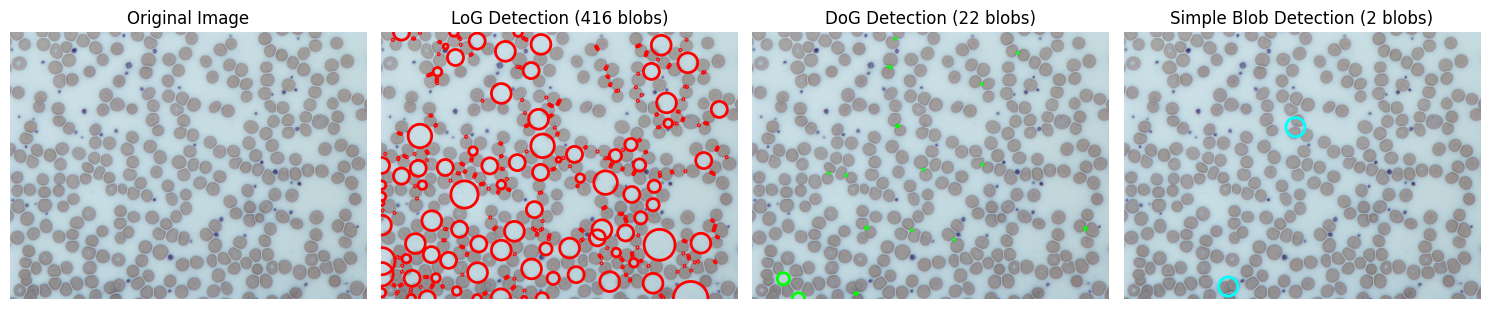

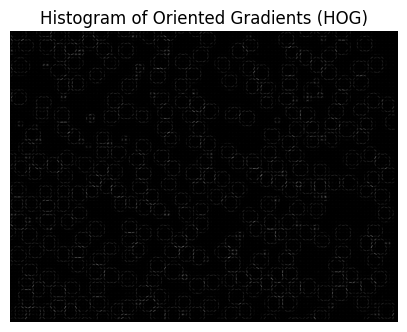

Number of blobs (LoG): 416
Number of blobs (DoG): 22
Number of blobs (Simple Blob Detector): 2

Processing candy.jpg


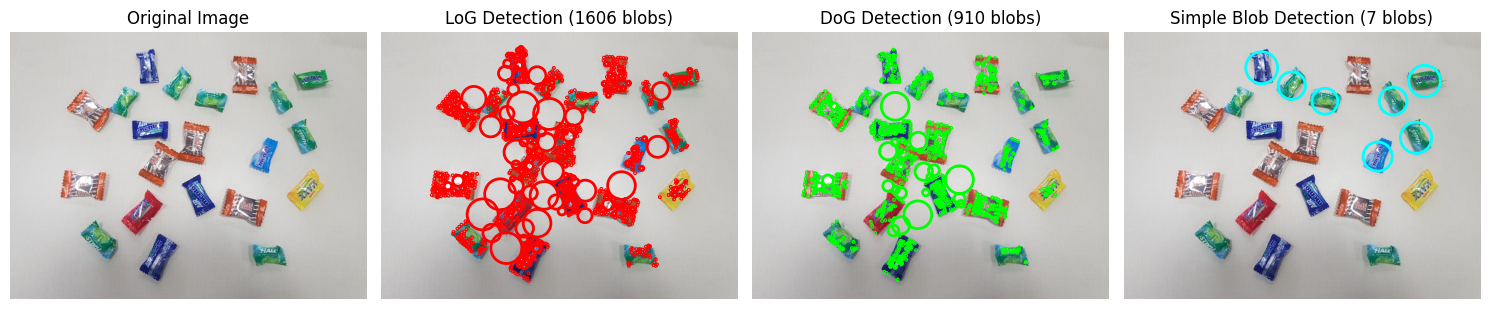

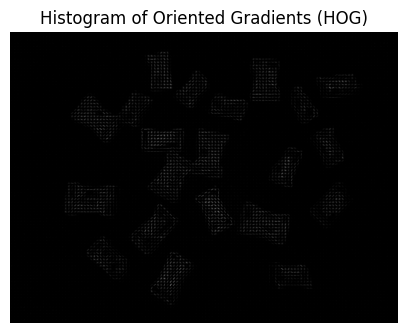

Number of blobs (LoG): 1606
Number of blobs (DoG): 910
Number of blobs (Simple Blob Detector): 7

Processing satellite1.png


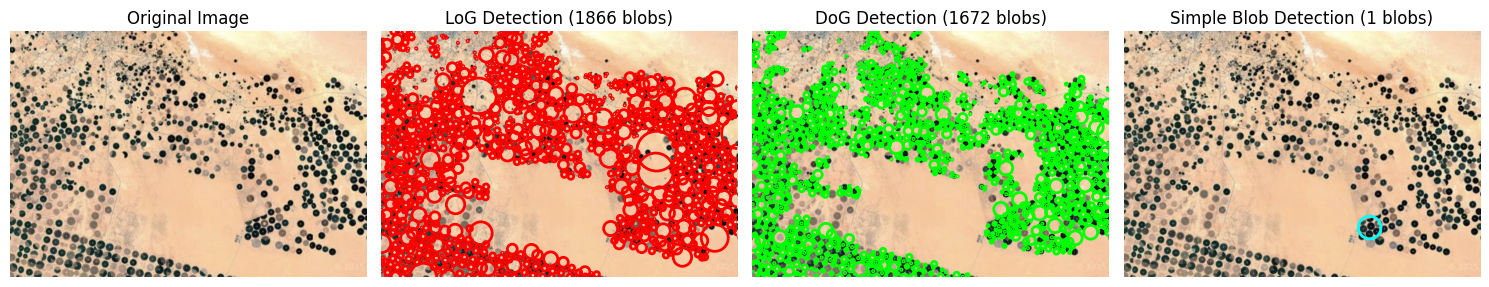

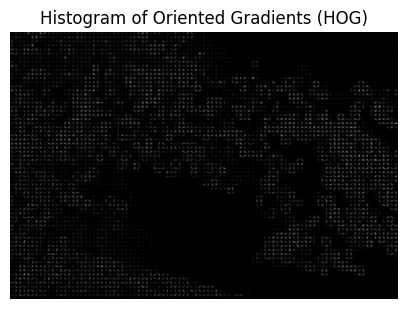

Number of blobs (LoG): 1866
Number of blobs (DoG): 1672
Number of blobs (Simple Blob Detector): 1

Processing satellite2.png


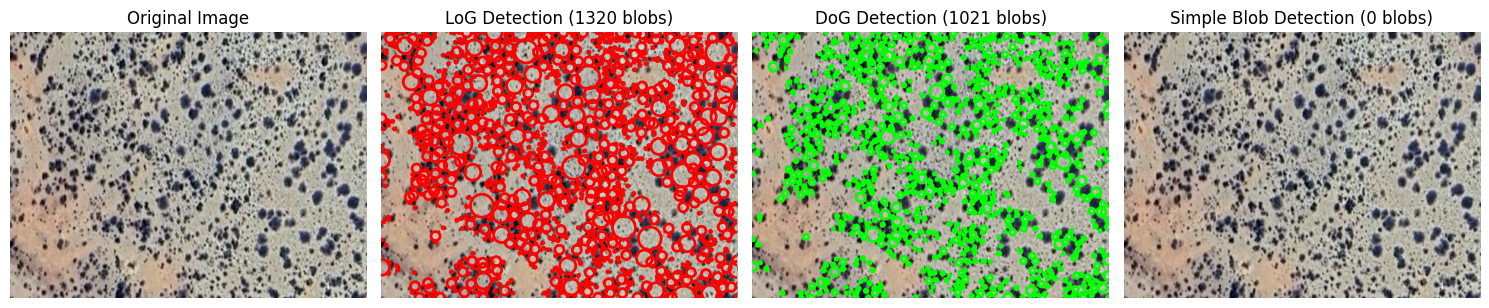

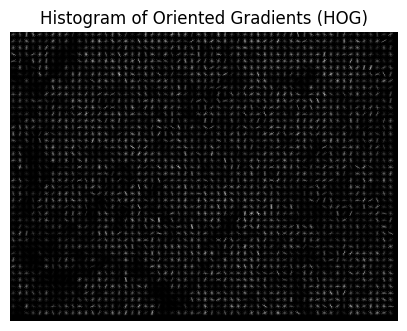

Number of blobs (LoG): 1320
Number of blobs (DoG): 1021
Number of blobs (Simple Blob Detector): 0


In [20]:
import cv2
import numpy as np
from skimage.feature import blob_log, blob_dog, hog
import matplotlib.pyplot as plt

class BlobDetector:
    def __init__(self, image_path):
        """Initialize with image path and load the image."""
        self.image_path = image_path
        try:
            self.original_image = cv2.imread(self.image_path, cv2.IMREAD_COLOR)
            if self.original_image is None:
                raise FileNotFoundError(f"Could not load image at {self.image_path}")
            self.gray_image = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2GRAY)
        except Exception as e:
            print(f"Error loading image: {e}")
            raise

    def detect_blobs_log(self, min_sigma=1, max_sigma=30, num_sigma=10, threshold=0.1):
        """Detect blobs using Laplacian of Gaussian (LoG)."""
        blobs = blob_log(self.gray_image, min_sigma=min_sigma, max_sigma=max_sigma, 
                         num_sigma=num_sigma, threshold=threshold)
        blobs[:, 2] = blobs[:, 2] * np.sqrt(2)  # Scale radii for visualization
        return blobs

    def detect_blobs_dog(self, min_sigma=1, max_sigma=30, threshold=0.1):
        """Detect blobs using Difference of Gaussian (DoG)."""
        blobs = blob_dog(self.gray_image, min_sigma=min_sigma, max_sigma=max_sigma, 
                         threshold=threshold)
        blobs[:, 2] = blobs[:, 2] * np.sqrt(2)  # Scale radii for visualization
        return blobs

    def detect_hog_features(self, orientations=9, pixels_per_cell=(8, 8), 
                           cells_per_block=(2, 2)):
        """Detect features using Histogram of Oriented Gradients (HOG)."""
        features, hog_image = hog(self.gray_image, orientations=orientations,
                                 pixels_per_cell=pixels_per_cell,
                                 cells_per_block=cells_per_block,
                                 visualize=True)
        return features, hog_image

    def detect_blobs_simple(self, min_threshold=10, max_threshold=200, 
                           min_area=1500, min_convexity=0.87, min_inertia=0.01):
        """Detect blobs using OpenCV SimpleBlobDetector."""
        params = cv2.SimpleBlobDetector_Params()
        params.minThreshold = min_threshold
        params.maxThreshold = max_threshold
        params.filterByArea = True
        params.minArea = min_area
        params.filterByConvexity = True
        params.minConvexity = min_convexity
        params.filterByInertia = True
        params.minInertiaRatio = min_inertia

        ver = (cv2.__version__).split('.')
        if int(ver[0]) < 3:
            detector = cv2.SimpleBlobDetector(params)
        else:
            detector = cv2.SimpleBlobDetector_create(params)
        
        keypoints = detector.detect(self.gray_image)
        blobs = np.array([[kp.pt[1], kp.pt[0], kp.size / 2] for kp in keypoints])
        return blobs

    def visualize_all_results(self, blobs_log, blobs_dog, blobs_simple, hog_image):
        """Visualize all detection results in a single figure with subplots."""
        plt.figure(figsize=(15, 12))
        
        # Original Image
        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        # LoG Detection
        plt.subplot(1,4, 2)
        plt.imshow(cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB))
        for blob in blobs_log:
            y, x, r = blob
            circle = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
            plt.gca().add_patch(circle)
        plt.title(f'LoG Detection ({len(blobs_log)} blobs)')
        plt.axis('off')
        
        # DoG Detection
        plt.subplot(1,4, 3)
        plt.imshow(cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB))
        for blob in blobs_dog:
            y, x, r = blob
            circle = plt.Circle((x, y), r, color='lime', linewidth=2, fill=False)
            plt.gca().add_patch(circle)
        plt.title(f'DoG Detection ({len(blobs_dog)} blobs)')
        plt.axis('off')
        
        # Simple Blob Detection
        plt.subplot(1,4, 4)
        plt.imshow(cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB))
        for blob in blobs_simple:
            y, x, r = blob
            circle = plt.Circle((x, y), r, color='cyan', linewidth=2, fill=False)
            plt.gca().add_patch(circle)
        plt.title(f'Simple Blob Detection ({len(blobs_simple)} blobs)')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # HOG Visualization (separate figure)
        plt.figure(figsize=(5, 5))
        plt.imshow(hog_image, cmap='gray')
        plt.title('Histogram of Oriented Gradients (HOG)')
        plt.axis('off')
        plt.show()

def process_image(image_path):
    """Process a single image with blob detection methods."""
    try:
        detector = BlobDetector(image_path)
        
        # Detect blobs with different methods
        blobs_log = detector.detect_blobs_log()
        blobs_dog = detector.detect_blobs_dog()
        blobs_simple = detector.detect_blobs_simple()
        _, hog_image = detector.detect_hog_features()
        
        # Visualize all results
        detector.visualize_all_results(blobs_log, blobs_dog, blobs_simple, hog_image)
        
        # Print blob counts
        print(f"Number of blobs (LoG): {len(blobs_log)}")
        print(f"Number of blobs (DoG): {len(blobs_dog)}")
        print(f"Number of blobs (Simple Blob Detector): {len(blobs_simple)}")
        
    except Exception as e:
        print(f"Error processing {image_path}: {e}")

def main():
    # List of images to process (modify as needed)
    image_paths = [
        "platelets.jpg",
        "candy.jpg",
        "satellite1.png",
        "satellite2.png"
    ]
    
    for image_path in image_paths:
        print(f"\nProcessing {image_path}")
        process_image(image_path)

if __name__ == "__main__":
    main()

## Image Enhancement

Processing flower.jpg


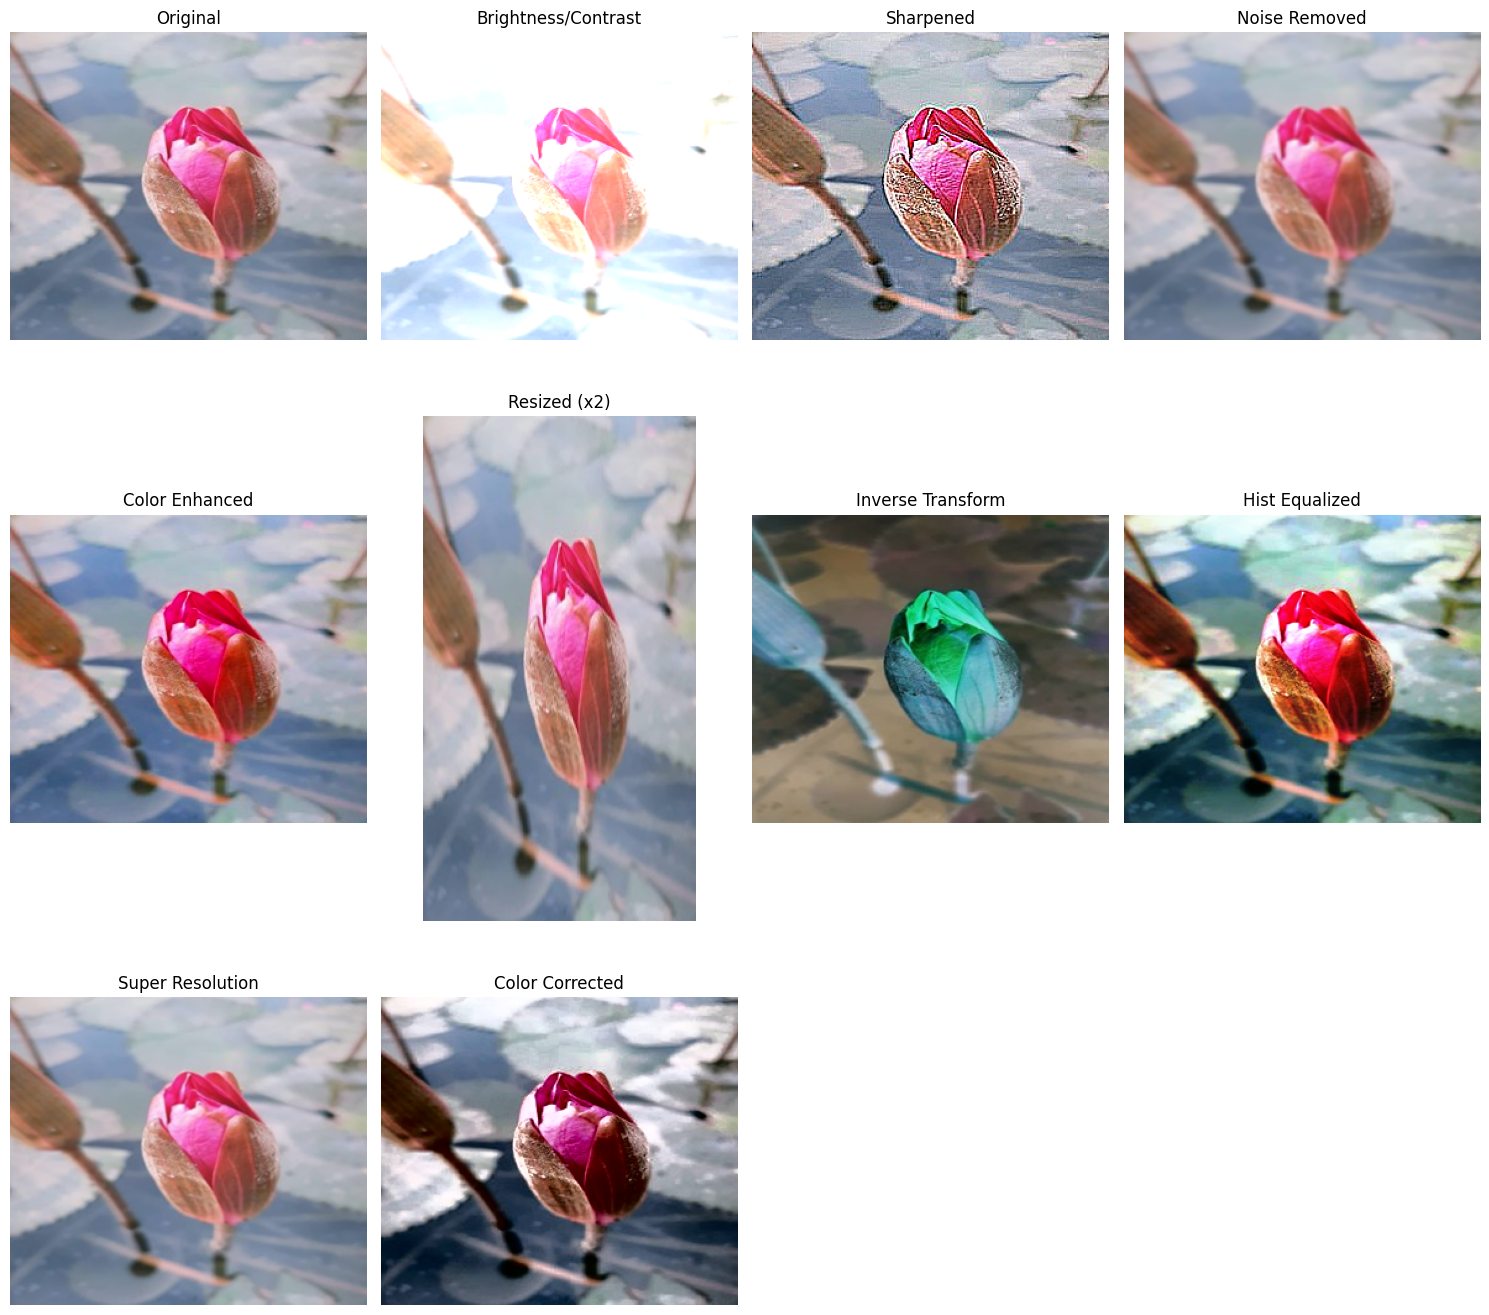

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ImageEnhancer:
    def __init__(self, image_path):
        """Initialize with image path and load the image."""
        self.image_path = image_path
        try:
            self.original_image = cv2.imread(self.image_path, cv2.IMREAD_COLOR)
            if self.original_image is None:
                raise FileNotFoundError(f"Could not load image at {self.image_path}")
        except Exception as e:
            print(f"Error loading image: {e}")
            raise

    def adjust_brightness_contrast(self, brightness=50, contrast=1.5):
        """Adjust brightness and contrast."""
        enhanced = cv2.convertScaleAbs(self.original_image, alpha=contrast, beta=brightness)
        return enhanced

    def sharpen_image(self):
        """Sharpen the image using a kernel."""
        kernel = np.array([[-1, -1, -1],
                          [-1,  9, -1],
                          [-1, -1, -1]])
        sharpened = cv2.filter2D(self.original_image, -1, kernel)
        return sharpened

    def remove_noise(self):
        """Remove noise using Gaussian blur."""
        denoised = cv2.GaussianBlur(self.original_image, (5, 5), 0)
        return denoised

    def enhance_color(self):
        """Enhance color by adjusting HSV saturation."""
        hsv = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        s = cv2.convertScaleAbs(s, alpha=1.5)
        enhanced_hsv = cv2.merge([h, s, v])
        enhanced = cv2.cvtColor(enhanced_hsv, cv2.COLOR_HSV2BGR)
        return enhanced

    def resize_image(self, scale_factor=2.0):
        """Resize image using INTER_CUBIC interpolation."""
        try:
            height, width = self.original_image.shape[:2]
            scale_x = 0.7
            scale_y = 1.5

            new_width = int(width * scale_x)
            new_height = int(height * scale_y)
            # new_height, new_width = int(height * scale_factor), int(width * scale_factor)
            resized = cv2.resize(self.original_image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
            return resized
        except Exception as e:
            print(f"Error resizing image: {e}")
            return self.original_image

    def inverse_transform(self):
        """Invert colors by subtracting from 255."""
        inverted = 255 - self.original_image
        return inverted

    def equalize_histogram(self):
        """Equalize histogram for each channel."""
        b, g, r = cv2.split(self.original_image)
        b_eq = cv2.equalizeHist(b)
        g_eq = cv2.equalizeHist(g)
        r_eq = cv2.equalizeHist(r)
        equalized = cv2.merge([b_eq, g_eq, r_eq])
        return equalized

    def super_resolution(self):
        """Apply simple super-resolution using pyrUp."""
        upscaled = cv2.pyrUp(self.original_image)
        return upscaled

    def color_correction(self):
        """Perform basic color correction (white balance simulation)."""
        lab = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        l = cv2.equalizeHist(l)
        corrected_lab = cv2.merge([l, a, b])
        corrected = cv2.cvtColor(corrected_lab, cv2.COLOR_LAB2BGR)
        return corrected

    def visualize_all(self):
        """Visualize all enhancements in a grid layout."""
        # Create all enhanced images
        enhanced_images = {
            "Original": self.original_image,
            "Brightness/Contrast": self.adjust_brightness_contrast(),
            "Sharpened": self.sharpen_image(),
            "Noise Removed": self.remove_noise(),
            "Color Enhanced": self.enhance_color(),
            "Resized (x2)": self.resize_image(),
            "Inverse Transform": self.inverse_transform(),
            "Hist Equalized": self.equalize_histogram(),
            "Super Resolution": self.super_resolution(),
            "Color Corrected": self.color_correction()
        }
        
        # Create subplot grid
        plt.figure(figsize=(15, 15))
        for i, (title, img) in enumerate(enhanced_images.items(), 1):
            plt.subplot(3, 4, i)  # 3 rows, 4 columns
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(title)
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()

def process_image(image_path):
    """Process the image with all enhancement techniques."""
    try:
        enhancer = ImageEnhancer(image_path)
        enhancer.visualize_all()
    except Exception as e:
        print(f"Error processing image: {e}")

def main():
    image_path = "flower.jpg"  # Change to your image path
    print(f"Processing {image_path}")
    process_image(image_path)

if __name__ == "__main__":
    main()